# <span style="color: #33cc33"> Insurance Claim Analysis Demographics and Health </span>
### <span style ="color : green ">    PraveenKarthik Arumugam </span>

linkedin - www.lindedin.com/in/pk7779

Github  - https://github.com/praveenkarthika/data_science/tree/main/Kaggle_Insurance_Claims_Demographics_Health

Youtube - https://youtu.be/OOLhKLXCJiU

# <span style="color : #33cc33"> 1. Problem Statement & Type </span>

#### Problem statement : To see how the data is clustered to identify the insurance claims across diff. age groups
#### Problem type : Clustering

# <span style="color : #33cc33"> 2. Data collection </span>


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as w
import numpy as np
w.filterwarnings('ignore')

df=pd.read_csv("insurance_data.csv")

# Displaying the top 5 rows of the dataset as a pandas dataframe
df.head()

,index,PatientID,age,gender,bmi,bloodpressure,diabetic,children,smoker,region,claim
0,0,1,39.0,male,23.2,91,Yes,0,No,southeast,1121.87
1,1,2,24.0,male,30.1,87,No,0,No,southeast,1131.51
2,2,3,NaN,male,33.3,82,Yes,0,No,southeast,1135.94
3,3,4,NaN,male,33.7,80,No,0,No,northwest,1136.40
4,4,5,NaN,male,34.1,100,No,0,No,northwest,1137.01


# <span style="color : #33cc33"> 3. Exploratory data analysis </span>


In [2]:
# Understanding the no. of rows , columns in the dataframe
df.shape

(1340, 11)

In [3]:
# Undestanding the various metrics like count, mean, standard deviation across the features(columns) that are numerical
df.describe()

,index,PatientID,age,bmi,bloodpressure,children,claim
count,1340.000000,1340.000000,1335.000000,1340.000000,1340.000000,1340.000000,1340.000000
mean,669.500000,670.500000,38.078652,30.668955,94.157463,1.093284,13252.745642
std,386.968991,386.968991,11.102924,6.106735,11.434712,1.205334,12109.609288
min,0.000000,1.000000,18.000000,16.000000,80.000000,0.000000,1121.870000
25%,334.750000,335.750000,29.000000,26.275000,86.000000,0.000000,4719.685000
50%,669.500000,670.500000,38.000000,30.400000,92.000000,1.000000,9369.615000
75%,1004.250000,1005.250000,47.000000,34.700000,99.000000,2.000000,16604.305000
max,1339.000000,1340.000000,60.000000,53.100000,140.000000,5.000000,63770.430000


In [4]:
# Undestanding the features's datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          1340 non-null   int64  
 1   PatientID      1340 non-null   int64  
 2   age            1335 non-null   float64
 3   gender         1340 non-null   object 
 4   bmi            1340 non-null   float64
 5   bloodpressure  1340 non-null   int64  
 6   diabetic       1340 non-null   object 
 7   children       1340 non-null   int64  
 8   smoker         1340 non-null   object 
 9   region         1337 non-null   object 
 10  claim          1340 non-null   float64
dtypes: float64(3), int64(4), object(4)
memory usage: 115.3+ KB


In [5]:
# Checking for NaN or null values
df.isna().sum()

index            0
PatientID        0
age              5
gender           0
bmi              0
bloodpressure    0
diabetic         0
children         0
smoker           0
region           3
claim            0
dtype: int64

In [6]:
# Checking for duplicate records
df.duplicated().sum()

0

In [7]:
# Filling the null or nan values with the respective features' Mean values
df.fillna(df.mean(), inplace=True)
df.shape

(1340, 11)

In [8]:
# Undestanding the unique values in feature 'region' 
df['region'].unique()

array(['southeast', 'northwest', nan, 'southwest', 'northeast'],
      dtype=object)

## <span style="color : #33cc33"> 3.1 Feature Engineering </span>


In [9]:
# Transforming the categorical labels (text values) in Gender to numerical
from  sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
gender_new=le.fit_transform(df['gender'])
df['gender_new']=gender_new
df_tranformed_gender= {'Gender':le.classes_, "Label Encoder":le.transform(le.classes_)}
pd.DataFrame(df_tranformed_gender)

,Gender,Label Encoder
0,female,0
1,male,1


In [10]:
# Transforming the categorical labels (text values) in Region to numerical
region_new=le.fit_transform(df['region'])
df['region_new']=region_new
df_tranformed_region = {'Region':le.classes_, 'Label Encoder': le.transform(le.classes_)}
pd.DataFrame(df_tranformed_region)

,Region,Label Encoder
0,northeast,0
1,northwest,1
2,southeast,2
3,southwest,3
4,NaN,4


In [11]:
# Transforming the categorical labels (text values) in diabetic to numerical
diabetic_new=le.fit_transform(df['diabetic'])
df['diabetic_new']=diabetic_new
df_tranformed_diabetic={"diabetic":le.classes_, "Label Encoder":le.transform(le.classes_)}
pd.DataFrame(df_tranformed_diabetic)

,diabetic,Label Encoder
0,No,0
1,Yes,1


In [12]:
# Transforming the categorical labels (text values) in Smoker to numerical
smoker_new=le.fit_transform(df['smoker'])
df['smoker_new']=smoker_new
df_tranformed_smoker={"smoker":le.classes_,"Label Encoder":le.transform(le.classes_)}
pd.DataFrame(df_tranformed_smoker)


,smoker,Label Encoder
0,No,0
1,Yes,1


In [13]:
# Dropping off the categorical columns after transforming them into numerical
df.drop('index',axis=1,inplace=True)
df.drop('gender',axis=1,inplace=True)
df.drop('smoker',axis=1,inplace=True)
df.drop('diabetic',axis=1,inplace=True)
df.drop('region',axis=1,inplace=True)
df

,PatientID,age,bmi,bloodpressure,children,claim,gender_new,region_new,diabetic_new,smoker_new
0,1,39.000000,23.2,91,0,1121.87,1,2,1,0
1,2,24.000000,30.1,87,0,1131.51,1,2,0,0
2,3,38.078652,33.3,82,0,1135.94,1,2,1,0
3,4,38.078652,33.7,80,0,1136.40,1,1,0,0
4,5,38.078652,34.1,100,0,1137.01,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1335,1336,44.000000,35.5,88,0,55135.40,0,1,1,1
1336,1337,59.000000,38.1,120,1,58571.07,0,0,0,1
1337,1338,30.000000,34.5,91,3,60021.40,1,1,1,1
1338,1339,37.000000,30.4,106,0,62592.87,1,2,0,1


# <span style="color : #33cc33"> 4. Model Development </span>


# <span style="color : #33cc33"> 4.1 KMeans Clustering </span>

## Identify the optimal K value for KMeans clustering using the Elbow Curve Technique


[196555393352.4051, 48223876663.14238, 23085806240.76776, 12163983635.40326, 8577770612.934674, 6185023070.970391, 4451620498.087078, 3513224954.173732, 2792914342.549877, 2268131564.8773007]


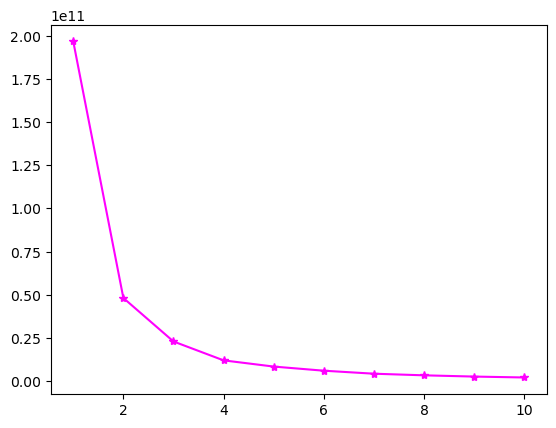

In [14]:
from sklearn.cluster import KMeans

iner=[]
k = [1,2,3,4,5,6,7,8,9,10]
for i in k:
    km=KMeans(n_clusters=i, init="k-means++", random_state=7)
    km.fit(df)
    iner.append(km.inertia_)
    
print(iner)    

plt.plot(k,iner,marker='*', color='fuchsia')
    

Silhouette_score for accuracy :: 0.7332739903794935


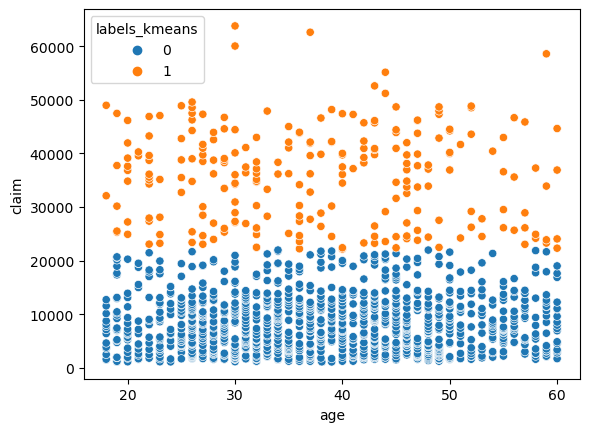

In [21]:
clus1=df[['age','claim']]

from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=2, init="k-means++",random_state=6)
model=kmeans.fit_predict(clus1)
model
df['labels_kmeans']=model

from sklearn.metrics import silhouette_score
ss=silhouette_score(df,df['labels_kmeans'])
print ("Silhouette_score for accuracy :: "+ str(ss))

sns.scatterplot(data=df, x=df['age'],y=df['claim'], hue=df['labels_kmeans'])
plt.show()


# <span style="color : #33cc33"> 4.2 DBSCAN clustering </span>
##  (Density based spatial clustering of application with noise) </span>


### Trying to find the optimal value for the eps (epsilon) and n_samples using the silhouette_score

In [16]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
clus1=df[['age','claim']]

eps_range=range(1,100)
silhouette_score_df=pd.DataFrame(columns=['eps','n_samples','silhouette_score'])
eps_range
min_sample_range=range(1,100)
for i in eps_range:
    for j in min_sample_range:
        
        dbscan= DBSCAN(eps=i, min_samples=j)
        model=dbscan.fit_predict(clus1)
        model_df=pd.DataFrame(model,columns=['labels_dbscan'])
        clus1_concatanated=pd.concat([clus1,model_df],axis=1)
        unique_labels_dbscan=len(np.unique(clus1_concatanated['labels_dbscan']))

        if(unique_labels_dbscan>1):
                ss= silhouette_score(clus1_concatanated, clus1_concatanated['labels_dbscan'])
                new_data = {'eps':i, 'n_samples':j, 'silhouette_score': ss}
                new_data_df=pd.DataFrame(new_data,index=[0])
                silhouette_score_df = silhouette_score_df.append(new_data_df)

silhouette_score_df.sort_values('silhouette_score',ascending=False, inplace=True)

print(silhouette_score_df.describe())
print(silhouette_score_df)

silhouette_score_df.to_csv('ss')

       silhouette_score
count       2921.000000
mean          -0.087528
std            0.215629
min           -0.810902
25%           -0.161678
50%           -0.138902
75%            0.075499
max            0.480282
   eps n_samples  silhouette_score
0   32         1          0.480282
0   31         1          0.477221
0   39         1          0.475866
0   30         1          0.475850
0   38         1          0.472616
..  ..       ...               ...
0    1         2         -0.689523
0    5         2         -0.694164
0    4         2         -0.741551
0    2         2         -0.767928
0    3         2         -0.810902

[2921 rows x 3 columns]


In [17]:
silhouette_score_df.nlargest(50, 'silhouette_score')

,eps,n_samples,silhouette_score
0,32,1,0.480282
0,31,1,0.477221
0,39,1,0.475866
0,30,1,0.475850
0,38,1,0.472616
0,33,1,0.470589
0,37,1,0.469285
0,29,1,0.469076
0,43,1,0.468881
0,36,1,0.468255


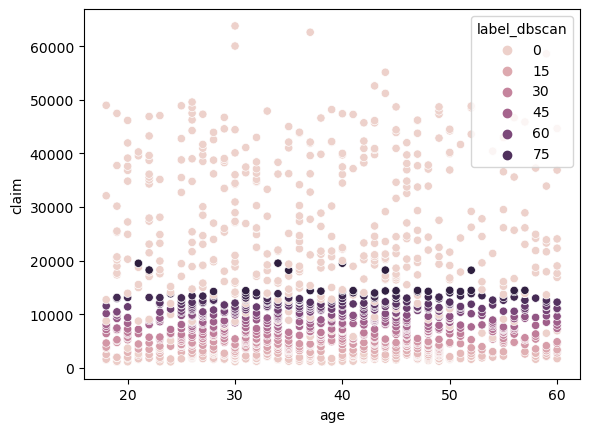

0.2552150771366692

In [18]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=35, min_samples=4)
model_dbscan=dbscan.fit_predict(clus1)
pd.DataFrame(dbscan.labels_).transpose
sns.scatterplot()
dbscan.labels_
df['label_dbscan']= dbscan.labels_
df

sns.scatterplot(x=df['age'],y=df['claim'],hue=df['label_dbscan'])
# sns.scatterplot(x=df.iloc[:0], y=df.iloc[:1],hue=df.iloc[:2])
plt.show()

(df['label_dbscan']).unique() 

silhouette_score(clus1, df['label_dbscan'])

In [19]:
df

,PatientID,age,bmi,bloodpressure,children,claim,gender_new,region_new,diabetic_new,smoker_new,labels_kmeans,label_dbscan
0,1,39.000000,23.2,91,0,1121.87,1,2,1,0,0,0
1,2,24.000000,30.1,87,0,1131.51,1,2,0,0,0,0
2,3,38.078652,33.3,82,0,1135.94,1,2,1,0,0,0
3,4,38.078652,33.7,80,0,1136.40,1,1,0,0,0,0
4,5,38.078652,34.1,100,0,1137.01,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1335,1336,44.000000,35.5,88,0,55135.40,0,1,1,1,1,-1
1336,1337,59.000000,38.1,120,1,58571.07,0,0,0,1,1,-1
1337,1338,30.000000,34.5,91,3,60021.40,1,1,1,1,1,-1
1338,1339,37.000000,30.4,106,0,62592.87,1,2,0,1,1,-1
